#Introduction to Dataset, DataLoader and Torchvision

In [1]:
#@markdown ---------------
#@markdown ## **⚠️❗ Ejecute esta celda para descargar Shoes dataset❗⚠️**
#@markdown ### Esta celda creará la carpeta ```/content/shoes_data```

!pip install -qq gdown
!gdown -qq "https://drive.google.com/uc?id=1_fIMm5nPp0BLJZKfkJZ_juRmLpRK4iA0" -O /shoes_data.zip
!mkdir /content/shoes_data/
!unzip -qq /shoes_data.zip -d /content/shoes_data
!rm -r /shoes_data.zip
print ("Done!")
#@markdown ---------------

Done!


In [ ]:
!ls /content/shoes_data/test/Boot | wc -l
!ls /content/shoes_data/test/Sandal/ | wc -l
!ls /content/shoes_data/test/Shoe/ | wc -l
!echo "========"
!ls /content/shoes_data/train/Boot | wc -l
!ls /content/shoes_data/train/Sandal/ | wc -l
!ls /content/shoes_data/train/Shoe/ | wc -l

1000
1000
1000
4000
4000
4000


In [2]:
import torch
from torch import nn
from torchsummary import summary
from torchvision import datasets
from torchvision import transforms as T
from torch.utils.data import DataLoader

from PIL import Image
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
#---- Importar librerias. Incluya acá todas las librerías que requiera
train_dataset = datasets.ImageFolder(root= '/content/shoes_data/train/' )
test_dataset = datasets.ImageFolder(root= '/content/shoes_data/test/' )

Dataset ImageFolder
    Number of datapoints: 12000
    Root location: /content/shoes_data/train/
(136, 102)


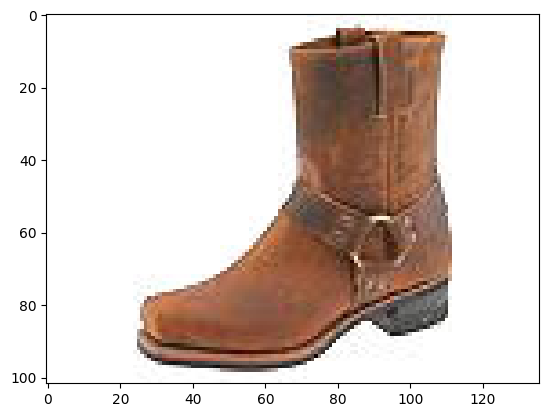

In [ ]:
print ( train_dataset )
print ( train_dataset[0][0].size )

plt.imshow( train_dataset[0][0] )
plt.title(train_dataset[0][1])

In [4]:
#esta funcion fue creada para sustituir lo que está arriba, asi mismo permite mostrar una cuadricula de imagenes en vez de una
def plot_images(imgs, grid_size = (5,5)):
    #
    _, axs = plt.subplots(grid_size[0], grid_size[1], figsize = (grid_size[0]*3, grid_size[1]*3))
    axs = axs.ravel()

    for i, (img, ax) in enumerate(zip(imgs, axs)):
      # if _ : #is tensor?
      #   img = _
      ax.imshow( img, cmap = 'gray' )
      ax.set_axis_off()

    plt.tight_layout()

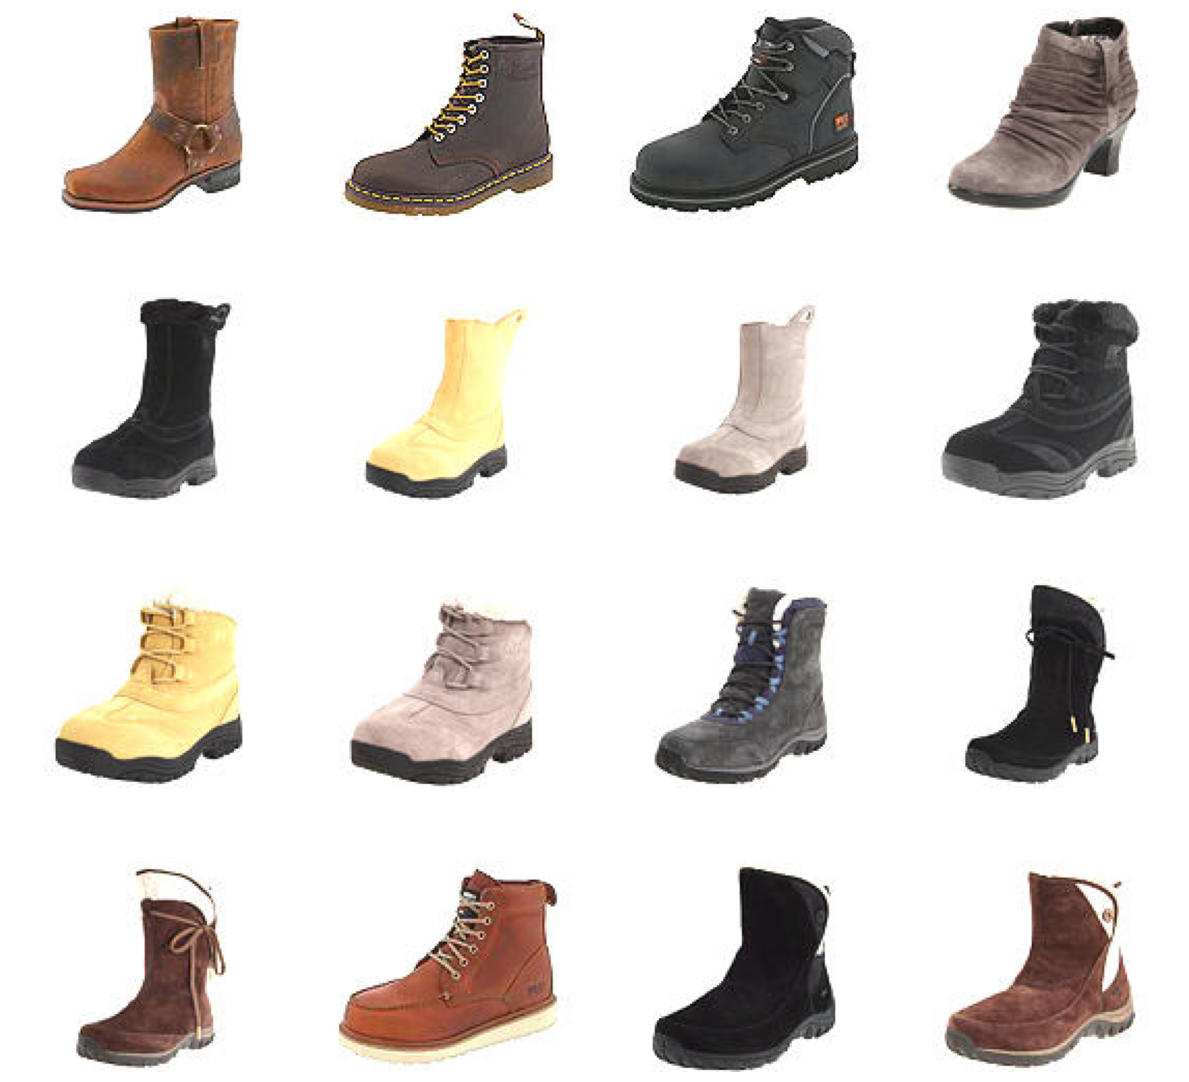

In [5]:
list_images = []
for i in range(16):
  list_images.append(train_dataset[i][0])

plot_images(list_images,grid_size=(4,4))

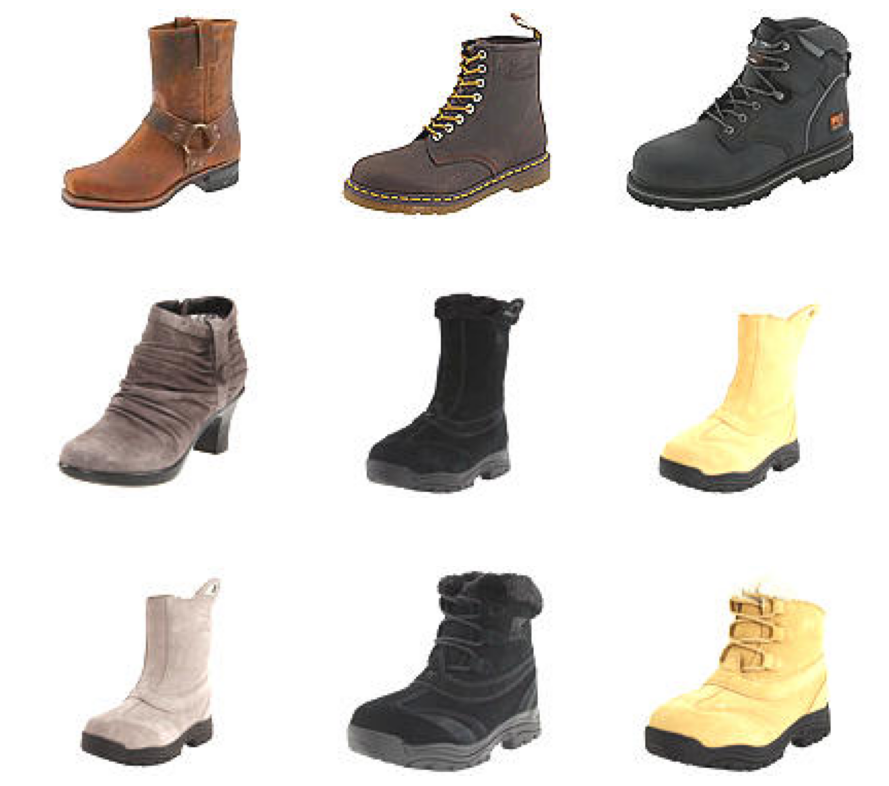

In [ ]:
#for en una sola linea, seria lo mismo que arriba
original_imgs = [ train_dataset[i][0]  for i in range(9)]
plot_images (original_imgs, grid_size = (3,3))

In [6]:
resizer = T.Resize(size=(50,50))
img = train_dataset[0][0]
resized_img = resizer(img)

print(img.size, resized_img.size)

(136, 102) (50, 50)


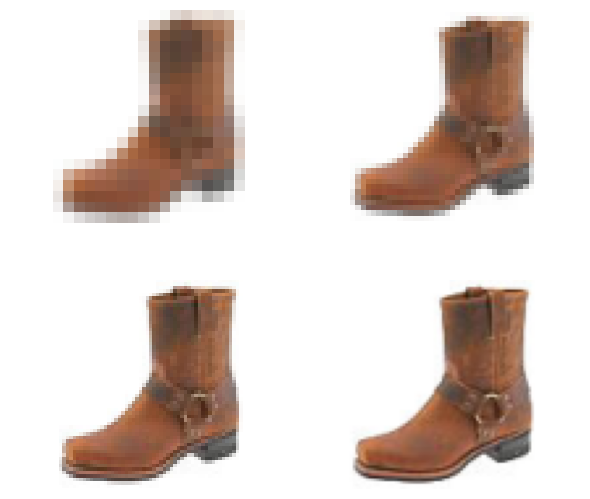

In [7]:
resized_imgs = [ T.Resize(size=size)( train_dataset[0][0] ) for size in (20,40,60,80)]
plot_images (resized_imgs, grid_size = (2,2))

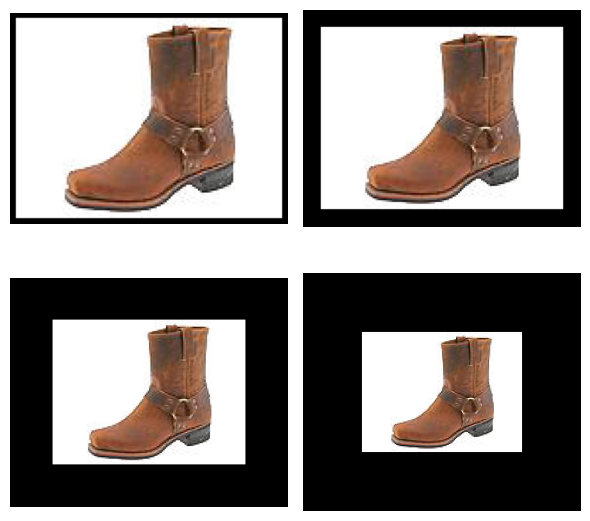

In [8]:
padded_imgs = [T.Pad(padding=padding)( train_dataset[0][0] )  for padding in (3, 10, 30, 50)]
plot_images (padded_imgs, grid_size = (2,2))

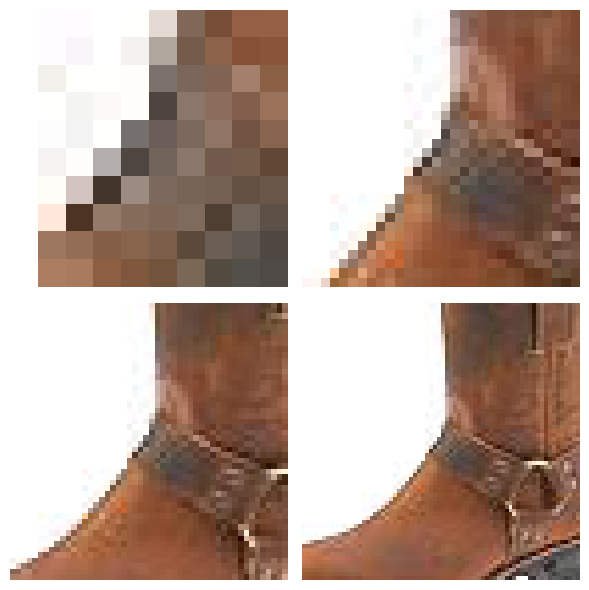

In [9]:
center_crops = [T.CenterCrop(size=size)( train_dataset[0][0] ) for size in (10,30, 50, 70)]
plot_images (center_crops, grid_size = (2,2))

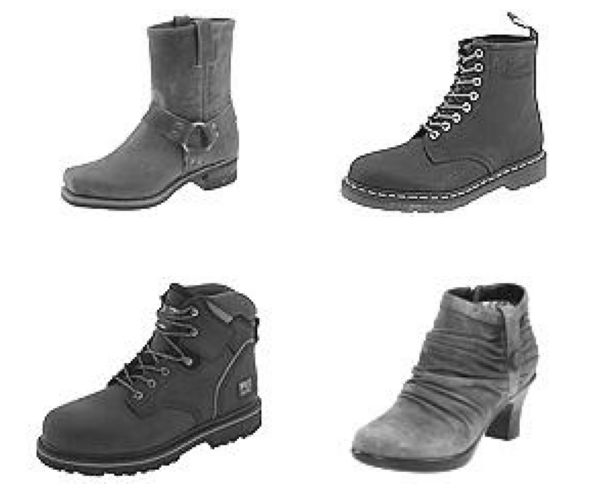

In [14]:
grayscale_imgs = [T.RandomGrayscale(p=0.5)( train_dataset[i][0] ) for i in range(4)]
plot_images (grayscale_imgs, grid_size = (2,2))

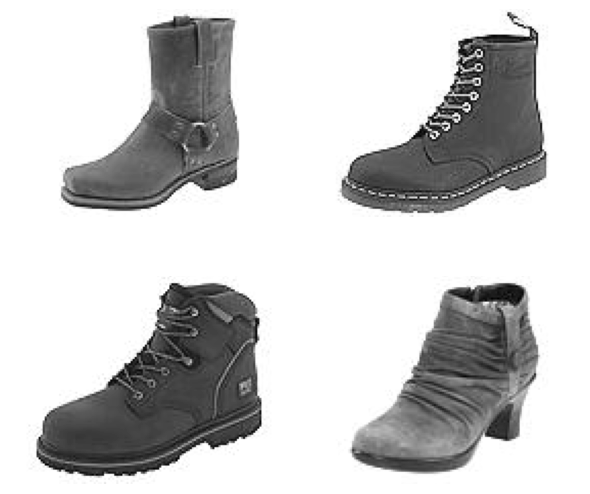

In [13]:
grayscale_imgs = [T.Grayscale()( train_dataset[i][0] ) for i in range(4)]
plot_images (grayscale_imgs, grid_size = (2,2))

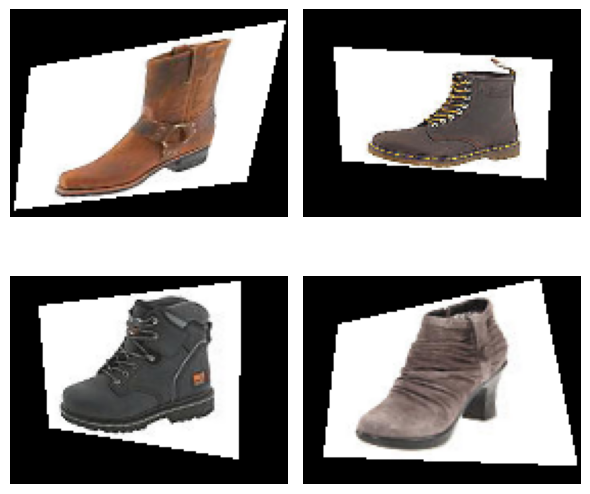

In [16]:
persp_imgs = [T.RandomPerspective(distortion_scale=0.6, p=1.0)( train_dataset[i][0] ) for i in range(4)]
plot_images (persp_imgs, grid_size = (2,2))

## Create a dataloader

In [17]:
image_transforms = T.Compose([T.Resize((64,64), Image.BICUBIC),
                              T.Grayscale(),
                              T.RandomPerspective(distortion_scale=0.6,p=0.5),
                              T.ToTensor()])
#compose siver para componer diferentes transformaciones

In [21]:
#---- Importar librerias. Incluya acá todas las librerías que requiera
train_dataset = datasets.ImageFolder(root= '/content/shoes_data/train/' , transform = image_transforms )
test_dataset = datasets.ImageFolder(root= '/content/shoes_data/test/' , transform = image_transforms )

train_loader = DataLoader(train_dataset, batch_size= 100 , shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= 100 )

In [ ]:
print(train_dataset[0][0].shape)

plt.imshow(train_dataset[0][0].numpy().squeeze(), cmap='gray')

In [22]:
batch_x, batch_y = next(iter(train_loader))
print(batch_x.shape,batch_y.shape)
#esto es lo mismo que abajo

torch.Size([100, 1, 64, 64]) torch.Size([100])


In [23]:
trainBatch = next(iter(train_loader))
valBatch = next(iter(test_loader))

In [24]:
print (trainBatch[0].shape)

torch.Size([100, 1, 64, 64])


In [25]:
#formas de los tensors
for i, (batch_x,batch_y) in enumerate(train_loader):
  print(batch_x.shape,batch_y.shape)
  if i ==5:break

torch.Size([100, 1, 64, 64]) torch.Size([100])
torch.Size([100, 1, 64, 64]) torch.Size([100])
torch.Size([100, 1, 64, 64]) torch.Size([100])
torch.Size([100, 1, 64, 64]) torch.Size([100])
torch.Size([100, 1, 64, 64]) torch.Size([100])
torch.Size([100, 1, 64, 64]) torch.Size([100])


In [35]:
#se continuaria con la rutina de entrenamiento que se ha estado usando
#vamos a poner un modelo
model = torch.nn.Sequential(
      nn.Linear(64*64,512),nn.ReLU(),
      nn.Linear(512,256), nn.ReLU(),
      nn.Linear(256,3), nn.Softmax()


)

summary(model, input_size=(64*64,), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]       2,097,664
              ReLU-2                  [-1, 512]               0
            Linear-3                  [-1, 256]         131,328
              ReLU-4                  [-1, 256]               0
            Linear-5                    [-1, 3]             771
           Softmax-6                    [-1, 3]               0
Total params: 2,229,763
Trainable params: 2,229,763
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.01
Params size (MB): 8.51
Estimated Total Size (MB): 8.53
----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1844: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return inner()


In [36]:
loss = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr =1e-3)

In [ ]:
epochs= 100
batch_size=100
losses=[]

progress= tqdm(range(epochs),ncols=100)

for epoch in progress:

  batch_losses=[]

  for batch_x, batch_y in train_loader:

    batch_x = batch_x.view(batch_size, -1).to(torch.float32)
    batch_y= nn.functional.one_hot(batch_y, num_classes=3 ).to(torch.float32)

     # 1.Zero the gradients
    optimizer.zero_grad()

    # 2.Perform forward pass
    batch_predictions = model(batch_x)

    # batch_predictions=torch.argmax(batch_predictions, dim=1)

    # 3.Compute loss
    batch_loss = loss(batch_predictions, batch_y)

    # 4.Perform backward pass
    batch_loss.backward()

    # 5.Optimize parameters
    optimizer.step()

    batch_losses.append(batch_loss.item())

  losses.append(np.mean(batch_losses))

  progress.set_description('Epoch [{0}/{1}], Loss: {2:0.5f}'.format(epoch,epochs,np.mean(batch_losses)))





In [ ]:
#APLICAR EL CUDA